In [17]:
from quantrocket.license import set_license
set_license("cadba980-de2e-11ee-93e1-4b30e8840aaa")

{'licensekey': 'cadb........0aaa', 'software_license': {}}

In [ ]:
from quantrocket.history import create_usstock_db
create_usstock_db("usstock-free-1d", free=True)
{'status': 'successfully created quantrocket.v2.history.usstock-free-1d.sqlite'}

In [20]:
from quantrocket.history import collect_history
collect_history("usstock-free-1d")
{'status': 'the historical data will be collected asynchronously'}

{'status': 'the historical data will be collected asynchronously'}

In [21]:
from quantrocket.history import download_history_file
download_history_file("usstock-free-1d",
                          start_date="2023-01-01", #YYYY-MM-DD
                          end_date="2023-12-31",
                          fields=["Close"],
                          sids=["FIBBG000B9XRY4"], ##AAPL's sid
                          filepath_or_buffer="apple.csv"
                     )

In [22]:
#Draft
import csv

with open('apple.csv', newline='') as csvfile:
    csvreader = csv.DictReader(csvfile)
    
    prev_row = None
    prev_row1 = None
   
    for row in csvreader:
        if row['Date'] == '2023-11-20':
            if prev_row is not None and prev_row1 is not None:
                print("Previous Row:", prev_row1)
                print("Previous Row:", prev_row)
                print("Current Row:", row)
        prev_row1 = prev_row
        prev_row = row


Previous Row: {'Sid': 'FIBBG000B9XRY4', 'Date': '2023-11-16', 'Close': '189.4682'}
Previous Row: {'Sid': 'FIBBG000B9XRY4', 'Date': '2023-11-17', 'Close': '189.4483'}
Current Row: {'Sid': 'FIBBG000B9XRY4', 'Date': '2023-11-20', 'Close': '191.206'}


In [25]:
import csv

with open('apple.csv', newline='') as csvfile:
    csvreader = csv.DictReader(csvfile)
    close = []
    for row in csvreader:
        close.append(float(row['Close']))
   # print(close)


In [26]:
r = []
for i in range(1,len(close)):
    R = (close[i]-close[i-1])/close[i-1]
    r.append(R)
print(len(r))  

249


In [27]:
s = []
for i in r:
    if(i>=0.01):
        s.append(1)
    elif(i>-0.01 and i<0.01):
        s.append(0)
    else:
        s.append(-1)
print(s)
print(len(s))

[1, -1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, -1, 0, 0, 1, 1, -1, 1, -1, 0, 0, 1, 0, 1, -1, 0, -1, 0, 0, -1, 0, 0, -1, 0, 1, 1, -1, 0, -1, -1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, -1, 0, 1, 0, 1, 0, 0, -1, 0, -1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, -1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 1, 0, 0, -1, 0, 0, 0, 0, 0, 1, 0, 0, -1, 0, -1, -1, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 1, -1, 1, 0, 1, 1, 0, 0, 0, -1, -1, 0, 0, -1, -1, 0, 0, 1, 0, -1, 0, 0, 0, -1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, -1, 0, 0, 0, 0, -1, 0, 0, -1, -1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, -1, 0, 1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
249


In [28]:
v = [0]
for i in range(1,len(s)):
    if(s[i-1] == 0 and s[i] == 1):
        v.append(v[i-1]+1)
    elif(s[i-1] == 0 and s[i] == -1 ):
         v.append(v[i-1]-1)
    else:
         v.append(v[i-1])
print(v)
print("Portfolio Value:",v[-1])

[0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 7, 7, 7, 6, 6, 6, 5, 5, 5, 4, 4, 5, 5, 5, 5, 4, 4, 4, 4, 4, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6, 7, 7, 7, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 9, 9, 9, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 17, 17, 17, 16, 16, 16, 16, 16, 16, 17, 17, 17, 16, 16, 15, 15, 15, 15, 15, 15, 15, 14, 14, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 15, 14, 14, 14, 14, 13, 13, 13, 13, 14, 14, 13, 13, 13, 13, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 12, 12, 12, 11, 11, 11, 12, 12, 13, 13, 13, 14, 14, 14, 14, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 18, 18, 17, 17, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17]
Portfolio Value: 17


In [29]:
from collections import defaultdict

# Initialize a dictionary to store transition counts
transition_counts = defaultdict(lambda: defaultdict(int))

# Iterate through the sequence of states and record transitions
for i in range(len(s) - 1):
    current_state = s[i]
    next_state = s[i + 1]
    transition_counts[current_state][next_state] += 1

# Calculate transition probabilities from counts
transition_probabilities = defaultdict(lambda: defaultdict(float))
for current_state, next_states in transition_counts.items():
    total_transitions = sum(next_states.values())
    for next_state, count in next_states.items():
        transition_probabilities[current_state][next_state] = count / total_transitions

# Print transition probabilities
for current_state, next_states in transition_probabilities.items():
    print(f"Transition probabilities from state {current_state}:")
    for next_state, probability in next_states.items():
        print(f"  State {current_state} to State {next_state}: {probability:.2f}")


Transition probabilities from state 1:
  State 1 to State -1: 0.12
  State 1 to State 0: 0.68
  State 1 to State 1: 0.20
Transition probabilities from state -1:
  State -1 to State 1: 0.11
  State -1 to State 0: 0.74
  State -1 to State -1: 0.14
Transition probabilities from state 0:
  State 0 to State 0: 0.60
  State 0 to State 1: 0.25
  State 0 to State -1: 0.15


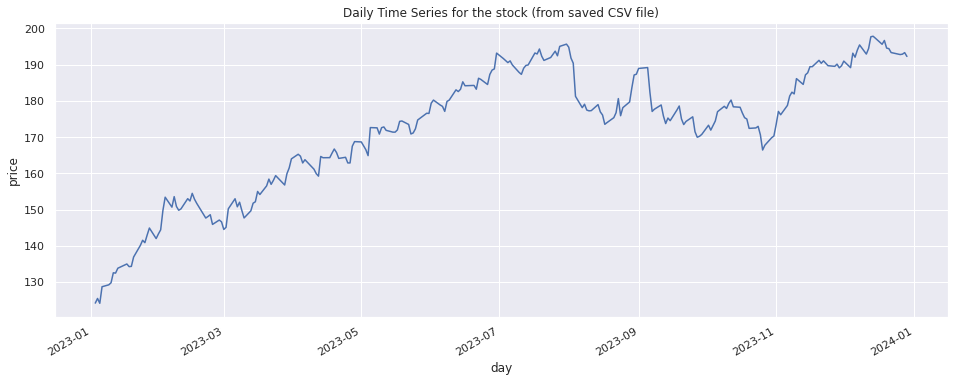

In [24]:
import  matplotlib.pyplot as plt
import pandas as pd
import  csv
stock_prices = pd.read_csv('apple.csv')

# Convert the date to datetime
stock_prices['Date'] = pd.to_datetime(stock_prices['Date'], format = '%Y-%m-%d')
# Assign this as index
stock_prices.set_index(['Date'], inplace=True)
# plot the price
stock_prices['Close'].plot()
plt.title('Daily Time Series for the stock (from saved CSV file)')
plt.xlabel('day')
plt.ylabel('price')
plt.show()